In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

## Data exploration

In [43]:
df = pd.read_csv('kc_house_data.csv', index_col='id')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


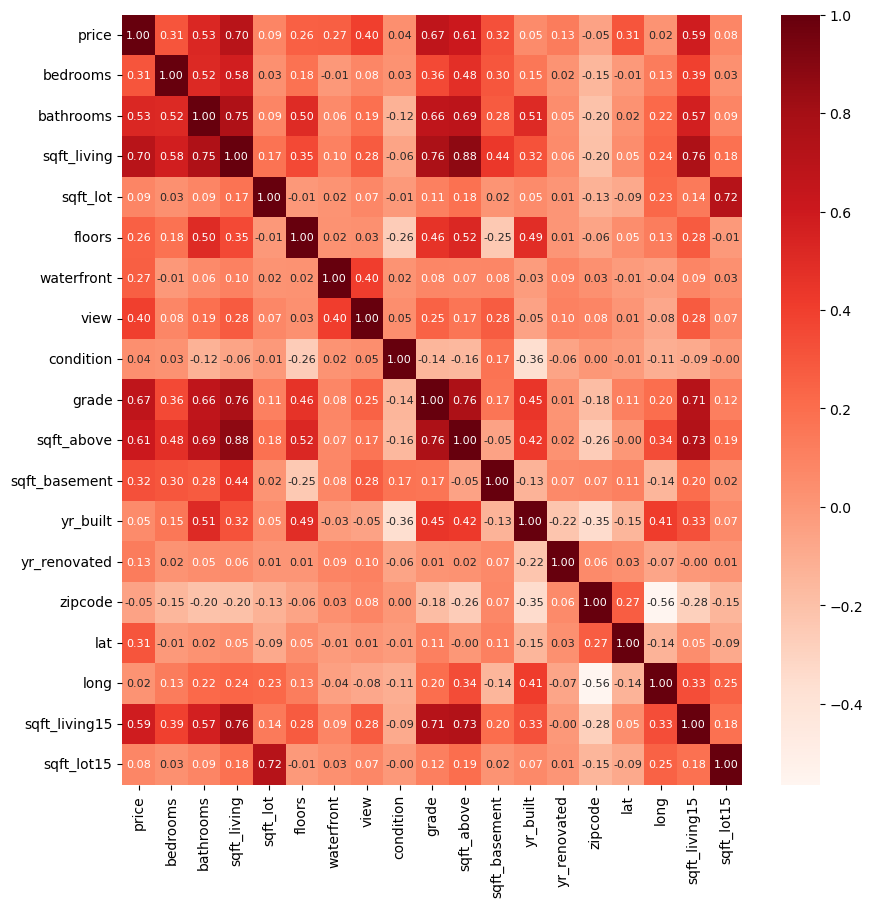

In [44]:
# Matrix de coorelation de DataFrame
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt='.2f',annot_kws={"fontsize":8})
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

## Rescale and feature engineering to a new DataFrame

In [46]:
new_df = df.drop(['date', 'zipcode', 'yr_renovated'], axis=1)

In [47]:
# Rescale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df['sqft_living'] = scaler.fit_transform(new_df['sqft_living'].values.reshape(-1,1))
new_df['sqft_lot'] = scaler.fit_transform(new_df['sqft_lot'].values.reshape(-1,1))
new_df['sqft_above'] = scaler.fit_transform(new_df['sqft_above'].values.reshape(-1,1))
new_df['sqft_living15'] = scaler.fit_transform(new_df['sqft_living15'].values.reshape(-1,1))
new_df['sqft_lot15'] = scaler.fit_transform(new_df['sqft_lot15'].values.reshape(-1,1))
new_df['sqft_basement'] = scaler.fit_transform(new_df['sqft_basement'].values.reshape(-1,1))
new_df['yr_built'] = scaler.fit_transform(new_df['yr_built'].values.reshape(-1,1))
new_df['lat'] = scaler.fit_transform(new_df['lat'].values.reshape(-1,1))
new_df['long'] = scaler.fit_transform(new_df['long'].values.reshape(-1,1))
new_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,5.400881e+05,3.370842,2.114757,3.174253e-16,3.281921e-17,1.494309,0.007542,0.234303,3.409430,7.656873,3.892022e-16,-2.022801e-15,3.592925e-15,-3.432958e-14,-3.663944e-14,-1.506632e-16,1.235382e-16
std,3.671272e+05,0.930062,0.770163,1.000023e+00,1.000023e+00,0.539989,0.086517,0.766318,0.650743,1.175459,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,7.500000e+04,0.000000,0.000000,-1.948891e+00,-3.521759e-01,1.000000,0.000000,0.000000,1.000000,1.000000,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01
25%,3.219500e+05,3.000000,1.750000,-7.108948e-01,-2.430487e-01,1.000000,0.000000,0.000000,3.000000,7.000000,-7.226314e-01,-6.586810e-01,-6.810785e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01
50%,4.500000e+05,3.000000,2.250000,-1.849914e-01,-1.808075e-01,1.500000,0.000000,0.000000,3.000000,7.000000,-2.758102e-01,-6.586810e-01,1.360059e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01
75%,6.450000e+05,4.000000,2.500000,5.118578e-01,-1.066880e-01,2.000000,0.000000,0.000000,4.000000,8.000000,5.091458e-01,6.066704e-01,8.849999e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02
max,7.700000e+06,33.000000,8.000000,1.247807e+01,3.950434e+01,3.500000,1.000000,4.000000,5.000000,13.000000,9.204044e+00,1.023238e+01,1.497813e+00,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01


In [48]:
X = new_df.drop('price', axis=1)
y = new_df['price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
5100402668,3,1.00,-0.555193,-0.231701,1.0,0,0,4,7,-0.867546,0.471097,-1.055576,0.968151,-0.746341,-0.315962,-0.233979
7856560480,3,2.50,-0.326539,-0.099155,1.0,0,0,4,8,-0.698479,0.629266,0.306232,-0.019143,0.460830,0.471927,-0.112383
2872900010,3,1.50,-1.077829,-0.126630,1.0,0,0,3,8,-0.843394,-0.658681,0.544548,0.473060,1.263244,-0.403505,-0.106450
3216900070,4,2.50,0.141657,-0.193821,2.0,0,0,3,8,0.509146,-0.658681,0.748819,-1.006438,0.219396,-0.024151,-0.211271
976000790,3,2.50,-0.304762,-0.249736,2.0,0,0,3,7,-0.662250,0.606670,0.476458,0.620288,-1.051685,-0.286781,-0.293202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322069010,5,5.00,2.047104,1.906878,2.0,0,0,3,10,2.622489,-0.658681,0.919045,-1.299451,1.440769,0.369794,1.893510
2114700368,2,2.50,-0.740293,-0.334262,2.0,0,0,3,8,-0.758860,-0.116388,1.259497,-0.186579,-0.959372,-1.351890,-0.411831
5469501200,3,2.25,0.304981,-0.003790,1.0,0,0,4,9,0.690290,-0.658681,0.238141,-1.259035,0.396921,1.070140,0.059316


## Neural network model

In [50]:
model = Sequential(
    [
        Dense(units=128, kernel_initializer='normal', input_dim=X_train.shape[1], activation="relu"),
        Dense(units=256, kernel_initializer='normal', activation="relu"),
        Dense(units=256, kernel_initializer='normal', activation="relu"),
        Dense(units=1, activation="linear"),
    ], name="kc_model"
)

In [51]:
model.summary()

Model: "kc_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2176      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 101,249
Trainable params: 101,249
Non-trainable params: 0
_________________________________________________________________


In [52]:
#### Examine Weights shapes
[layer1, layer2, layer3, layer4] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (16, 128), b1 shape = (128,)
W2 shape = (128, 256), b2 shape = (256,)
W3 shape = (256, 256), b3 shape = (256,)
W4 shape = (256, 1), b4 shape = (1,)


In [53]:
model.layers[1].weights

[<tf.Variable 'dense_9/kernel:0' shape=(128, 256) dtype=float32, numpy=
 array([[-0.06978508, -0.0697832 , -0.06155343, ...,  0.02329716,
          0.0503148 ,  0.06685763],
        [-0.03892423, -0.0126252 ,  0.07809037, ..., -0.00617739,
          0.07655156, -0.07085236],
        [ 0.0734432 ,  0.02314122,  0.12742333, ...,  0.03377388,
          0.00436392,  0.09455895],
        ...,
        [-0.03974565, -0.03669972, -0.00198362, ...,  0.00966685,
          0.02812874,  0.05218827],
        [-0.02046773, -0.00711416, -0.04589225, ..., -0.06249857,
          0.04721488,  0.05886142],
        [-0.08087527, -0.06748368,  0.05240915, ...,  0.04200594,
         -0.00736518,  0.05819524]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(256,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [54]:
X_train_numpy = np.array(X_train)
y_train_numpy = np.array(y_train)
X_train_numpy.shape

(17290, 16)

In [55]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [56]:
model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

model.fit(
    X_train_numpy, y_train_numpy,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks_list
)

Epoch 1/50
412/433 [===========================>..] - ETA: 0s - loss: 299396.6875 - mean_absolute_error: 299396.6875
Epoch 1: val_loss improved from inf to 136031.59375, saving model to Weights-001--136031.59375.hdf5
433/433 [==============================] - 1s 2ms/step - loss: 291757.5000 - mean_absolute_error: 291757.5000 - val_loss: 136031.5938 - val_mean_absolute_error: 136031.5938
Epoch 2/50
412/433 [===========================>..] - ETA: 0s - loss: 130767.9219 - mean_absolute_error: 130767.9219
Epoch 2: val_loss improved from 136031.59375 to 119712.53906, saving model to Weights-002--119712.53906.hdf5
433/433 [==============================] - 1s 1ms/step - loss: 129602.3047 - mean_absolute_error: 129602.3047 - val_loss: 119712.5391 - val_mean_absolute_error: 119712.5391
Epoch 3/50
417/433 [===========================>..] - ETA: 0s - loss: 123519.9688 - mean_absolute_error: 123519.9688
Epoch 3: val_loss improved from 119712.53906 to 117518.99219, saving model to Weights-003--117

## Prediction

In [57]:
X_test_numpy = np.array(X_test)
y_test_numpy = np.array(y_test)

In [58]:
# Data scatter of predicted values
y_pred = model.predict(X_test_numpy)
y_test_numpy

136/136 [==============================] - 0s 778us/step


array([ 297000., 1578000.,  562100., ...,  369950.,  300000.,  575950.])

In [59]:
y_pred = np.reshape(y_pred, (y_pred.shape[0],))
y_pred

array([ 305743.8 , 1591220.6 ,  535063.75, ...,  373536.84,  236273.7 ,
        490234.3 ], dtype=float32)

In [60]:
# Mean Absolute Percentage Error
model.evaluate(X_test_numpy, y_test_numpy)

136/136 [==============================] - 0s 763us/step - loss: 79593.6641 - mean_absolute_error: 79593.6641


[79593.6640625, 79593.6640625]

In [61]:
# p-value
from sklearn.metrics import r2_score
r2_score(y_test_numpy, y_pred)

0.8247269957347027